In [65]:
from qiskit import *
import numpy as np

from mido import Message, MidiFile, MidiTrack
from mido import *
import mido

from qiskit.tools.visualization import plot_histogram

In [66]:
def add_circuit(qc):
    qc.h(0)
    qc.cx(0,1)
    return qc

In [67]:
def Teleportation(qc):
    qc.z(0); qc.h(0)
    qc.h(1)
    qc.cx(1,2); qc.cx(0,1)
    
    qc.measure(1,1)
    qc.cx(1,2); qc.h(0)
    qc.measure(0,0)
    qc.cz(0,2)
    
    qc.h(2); qc.z(2)
    qc.measure(2,2)
    
    return qc

In [68]:
def grover(qc):
    qc.h(0)
    qc.h(1)

    qc.x(0)
    qc.x(1)
    
    qc.cz(0,1)
    qc.x(0)
    qc.x(1)
    
    qc.h(0)
    qc.h(1)
    
    qc.cz(0,1)
    qc.h(0)
    qc.h(1)
    
    return qc

In [69]:
def Bertstein_Vazirani(qc):
    qc.h(0); qc.h(1); qc.h(2); qc.h(3)
    qc.z(0); qc.z(1); qc.z(2); qc.z(3)
    qc.h(0); qc.h(1); qc.h(2); qc.h(3)
    
    qc.measure([0,1,2,3], [0,1,2,3])
    return qc

In [70]:
Beat_array = []
Beat1 = [0,1,0,0,1,0,1,0,1,0]; Beat_array.append(Beat1)
Beat2 = [1,1,0,1,1,0,1,1,1,1]; Beat_array.append(Beat2)
Beat3 = [0,0,0,1,1,1,1,0,0,1]; Beat_array.append(Beat3)
Beat4 = [1,0,0,0,1,1,0,0,0,1]; Beat_array.append(Beat4)


In [71]:
## The 4 starting Beats being converted to MIDI

mid = MidiFile()
track = MidiTrack()
mid.tracks.append(track)

current_time = 0

for bt in Beat_array[0]:
    if bt == 1:
        track.append(Message('note_on', note=32, time=100))#current_time))
    else:
        track.append(Message('note_off', note=32,time=100))#current_time))
    #current_time = current_time + 32

mid.save('/Users/scottoshiro/Documents/Qiskit_Camp/pBeat1.mid')

mid = MidiFile()
track = MidiTrack()
mid.tracks.append(track)


for bt in Beat_array[1]:
    if bt == 1:
        track.append(Message('note_on', note=35, time=100))#current_time))
    else:
        track.append(Message('note_off', note=35, time=100))#current_time))
    #current_time = current_time + 32

mid.save('/Users/scottoshiro/Documents/Qiskit_Camp/pBeat2.mid')

mid = MidiFile()
track = MidiTrack()
mid.tracks.append(track)


for bt in Beat_array[2]:
    if bt == 1:
        track.append(Message('note_on', note=38, time=100))#current_time))
    else:
        track.append(Message('note_off', note=38, time=100))#current_time))
    #current_time = current_time + 32

mid.save('/Users/scottoshiro/Documents/Qiskit_Camp/pBeat3.mid')

mid = MidiFile()
track = MidiTrack()
mid.tracks.append(track)


for bt in Beat_array[3]:
    if bt == 1:
        track.append(Message('note_on', note=40, time=100))#current_time))
    else:
        track.append(Message('note_off', note=40, time=100))#current_time))
    #current_time = current_time + 32

mid.save('/Users/scottoshiro/Documents/Qiskit_Camp/pBeat4.mid')

In [72]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

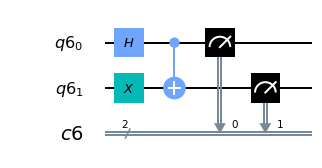

In [73]:
#qc = QuantumCircuit(qr, cr)
circuits = []

for i, val in enumerate(Beat1):
    qc = QuantumCircuit(qr, cr)
    if val == 1:
        qc.x(0)
        
    if Beat2[i] == 1:
        qc.x(1)
        
    add_circuit(qc)
    
    qc.measure([0,1], [0,1])
    circuits.append(qc)
    
circuits[0].draw(output='mpl')

In [74]:
## Execuuting code

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuits, backend = simulator, shots=1).result()

cir_array = []

for c in circuits:
    cir_array.append([k for k in result.get_counts(c).keys()][0])

new_track1 = []
new_track2 = []
    
for b in cir_array:
    new_track1.append(int(b[0]))
    new_track2.append(int(b[1]))
    
#print(cir_array); 
print(new_track1), print(new_track2)

[0, 1, 1, 0, 1, 0, 1, 0, 1, 1]
[1, 0, 1, 1, 0, 0, 0, 1, 0, 0]


(None, None)

In [41]:
## New Midi Rhythms

mid = MidiFile()
track = MidiTrack()
mid.tracks.append(track)

current_time = 0

for bt in new_track1:
    if bt == 1:
        track.append(Message('note_on', note=32, time=100))#current_time))
    else:
        track.append(Message('note_off',  note=32, time=100))#current_time))
    #current_time = current_time + 32

mid.save('/Users/scottoshiro/Documents/Qiskit_Camp/Bell_Circ.mid')

mid = MidiFile()
track2 = MidiTrack()
mid.tracks.append(track2)

current_time = 0

for bt in new_track2:
    if bt == 1:
        track2.append(Message('note_on', note=35, time=100))#current_time))
    else:
        track2.append(Message('note_off', note=35, time=100))#current_time))
    #current_time = current_time + 32
mid.save('/Users/scottoshiro/Documents/Qiskit_Camp/Bell_Circ2.mid')

In [192]:
###--------------- Rhythm #2 ------------------------------------------------------------------------------------------

In [105]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)

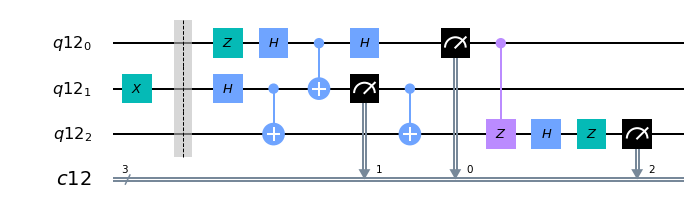

In [106]:
circuits = []

for i, val in enumerate(Beat1):
    qc = QuantumCircuit(qr, cr)
    if val == 1:
        qc.x(0)
        
    if Beat2[i] == 1:
        qc.x(1)
        
    if Beat3[i] == 1:
        qc.x(2)
    
    qc.barrier()
    Teleportation(qc)
    
    circuits.append(qc)
    
circuits[0].draw(output='mpl')

In [107]:
simulator = Aer.get_backend('qasm_simulator')

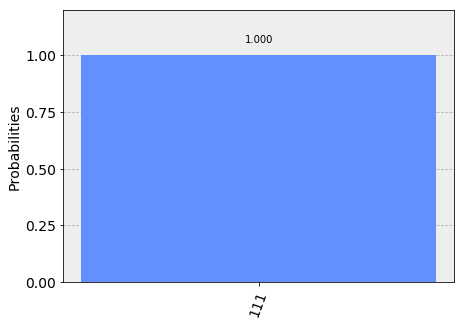

In [125]:
result = execute(circuits, backend = simulator, shots=1).result()
plot_histogram(result.get_counts(qc))

In [118]:
print(len(result.results))

1


In [121]:
## Execuuting code
cir_array = []

for c in circuits:
    cir_array.append([k for k in result.get_counts(c).keys()][0])

new_track1 = []
new_track2 = []
new_track3 = []
    
for b in cir_array:
    new_track1.append(int(b[0]))
    new_track2.append(int(b[1]))
    new_track3.append(int(b[2]))
    
#print(cir_array); 
print(new_track1), print(new_track2); print(new_track3)

[1, 0, 0, 1, 0, 0, 0, 1, 0, 1]
[0, 1, 0, 0, 0, 0, 1, 1, 0, 0]
[1, 1, 1, 1, 0, 1, 0, 1, 0, 1]


In [213]:
qr = QuantumRegister(4)
cr = ClassicalRegister(4)

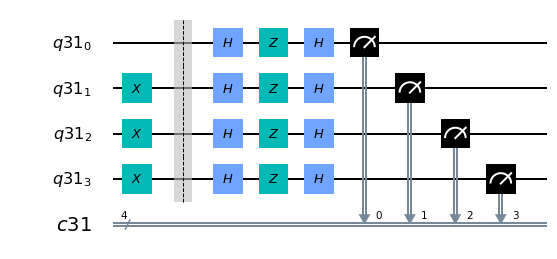

In [214]:
circuits = []

for i, val in enumerate(Beat1):
    qc = QuantumCircuit(qr, cr)
    if val == 1:
        qc.x(0)
        
    if Beat2[i] == 1:
        qc.x(1)
        
    if Beat2[i] == 1:
        qc.x(2)
    
    if Beat2[i] == 1:
        qc.x(3)
        
    qc.barrier()
    Bertstein_Vazirani(qc)
    
    circuits.append(qc)
    
    
circuits[0].draw(output='mpl')

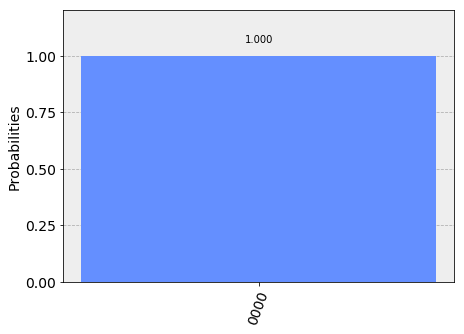

In [212]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuits, backend = simulator, shots=1024).result()
plot_histogram(result.get_counts(circuits[4]))

In [49]:
## Execuuting code
cir_array = []

for c in circuits:
    cir_array.append([k for k in result.get_counts(c).keys()][0])

new_track1 = []
new_track2 = []
new_track3 = []
    
for b in cir_array:
    new_track1.append(int(b[0]))
    new_track2.append(int(b[1]))
    new_track3.append(int(b[2]))
    
#print(cir_array); 
print(new_track1), print(new_track2); print(new_track3)

QiskitError: 'Data for experiment "circuit40" could not be found.'

In [123]:
mid = MidiFile()
track = MidiTrack()
mid.tracks.append(track)

for bt in new_track1:
    if bt == 1:
        track.append(Message('note_on', note=32, time=100))#current_time))
    else:
        track.append(Message('note_off', note=32, time=100))#current_time))
    #current_time = current_time + 32

mid.save('/Users/scottoshiro/Documents/Qiskit_Camp/new_teleport1.mid')

mid = MidiFile()
track2 = MidiTrack()
mid.tracks.append(track2)

for bt in new_track2:
    if bt == 1:
        track2.append(Message('note_on', note=35, time=100))#current_time))
    else:
        track2.append(Message('note_off', note=35,time=100))#current_time))
    #current_time = current_time + 32

mid.save('/Users/scottoshiro/Documents/Qiskit_Camp/new_teleport2.mid')

mid = MidiFile()
track3 = MidiTrack()
mid.tracks.append(track3)

for bt in new_track3:
    if bt == 1:
        track3.append(Message('note_on', note=38, time=100))#current_time))
    else:
        track3.append(Message('note_off', note=38, time=100))#current_time))
    #current_time = current_time + 32

mid.save('/Users/scottoshiro/Documents/Qiskit_Camp/new_teleport3.mid')

In [75]:
## -----------------------------------------------------------------------

In [76]:
## The 4 starting Beats being converted to MIDI

mid = MidiFile()
track = MidiTrack()
mid.tracks.append(track)

current_time = 0

for bt in Beat_array[0]:
    if bt == 1:
        track.append(Message('note_on', time=100))#current_time))
    else:
        track.append(Message('note_off', time=100))#current_time))
    #current_time = current_time + 32

mid.save('/Users/scottoshiro/Documents/Qiskit_Camp/pBeat1.mid')

mid = MidiFile()
track = MidiTrack()
mid.tracks.append(track)


for bt in Beat_array[1]:
    if bt == 1:
        track.append(Message('note_on', time=100))#current_time))
    else:
        track.append(Message('note_off', time=100))#current_time))
    #current_time = current_time + 32

mid.save('/Users/scottoshiro/Documents/Qiskit_Camp/pBeat2.mid')

mid = MidiFile()
track = MidiTrack()
mid.tracks.append(track)


for bt in Beat_array[2]:
    if bt == 1:
        track.append(Message('note_on', time=100))#current_time))
    else:
        track.append(Message('note_off', time=100))#current_time))
    #current_time = current_time + 32

mid.save('/Users/scottoshiro/Documents/Qiskit_Camp/pBeat3.mid')

mid = MidiFile()
track = MidiTrack()
mid.tracks.append(track)


for bt in Beat_array[3]:
    if bt == 1:
        track.append(Message('note_on', time=100))#current_time))
    else:
        track.append(Message('note_off', time=100))#current_time))
    #current_time = current_time + 32

mid.save('/Users/scottoshiro/Documents/Qiskit_Camp/pBeat4.mid')